## Hoja de Trabajo No. 3 - Clasificación

### EJERCICIO 1

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

EJERCICIO 1.1

In [73]:
# Cargar los datos desde el archivo CSV
datos = pd.read_csv('manzanasMD.csv')
datos['Acidez'] = pd.to_numeric(datos['Acidez'], errors='coerce')
# Obtener un resumen estadístico básico
resumen = datos.describe()
print(resumen)

                ID       Tamaño         Peso      Dulzura      Textura  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

           Humedad      Madurez       Acidez  
count  4000.000000  4000.000000  4000.000000  
mean      0.512118     0.498277     0.076877  
std       1.930286     1.874427     2.110270  
min      -5.961897    -5.864599    -7.010538  
25%      -0.801286    -0.771677    -1.377424  
50%       0.534219     0.503445     0.022609  
75% 

In [74]:
# Obtener información general del datosFrame
info = datos.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       4000 non-null   float64
 1   Tamaño   4000 non-null   float64
 2   Peso     4000 non-null   float64
 3   Dulzura  4000 non-null   float64
 4   Textura  4000 non-null   float64
 5   Humedad  4000 non-null   float64
 6   Madurez  4000 non-null   float64
 7   Acidez   4000 non-null   float64
 8   Calidad  4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB
None


EJERCICIO 1.2

In [75]:
tipos_datos = datos.dtypes
print("Tipos de datos de las variables:")
for columna, tipo in tipos_datos.items():
    print(f"{columna}: {tipo}")

print("\nTipos de variables:")

for columna, tipo in tipos_datos.items():
    if tipo == object:
        tipo_variable = "Cualitativa o categórica"
    elif tipo in [int]:
        tipo_variable = "Cuantitativa discreta"
    elif tipo in [float]:
        tipo_variable = "Cuantitativa continua"
    print(f"{columna}: {tipo_variable}")

Tipos de datos de las variables:
ID: float64
Tamaño: float64
Peso: float64
Dulzura: float64
Textura: float64
Humedad: float64
Madurez: float64
Acidez: float64
Calidad: object

Tipos de variables:
ID: Cuantitativa continua
Tamaño: Cuantitativa continua
Peso: Cuantitativa continua
Dulzura: Cuantitativa continua
Textura: Cuantitativa continua
Humedad: Cuantitativa continua
Madurez: Cuantitativa continua
Acidez: Cuantitativa continua
Calidad: Cualitativa o categórica


EJERCICIO 1.3

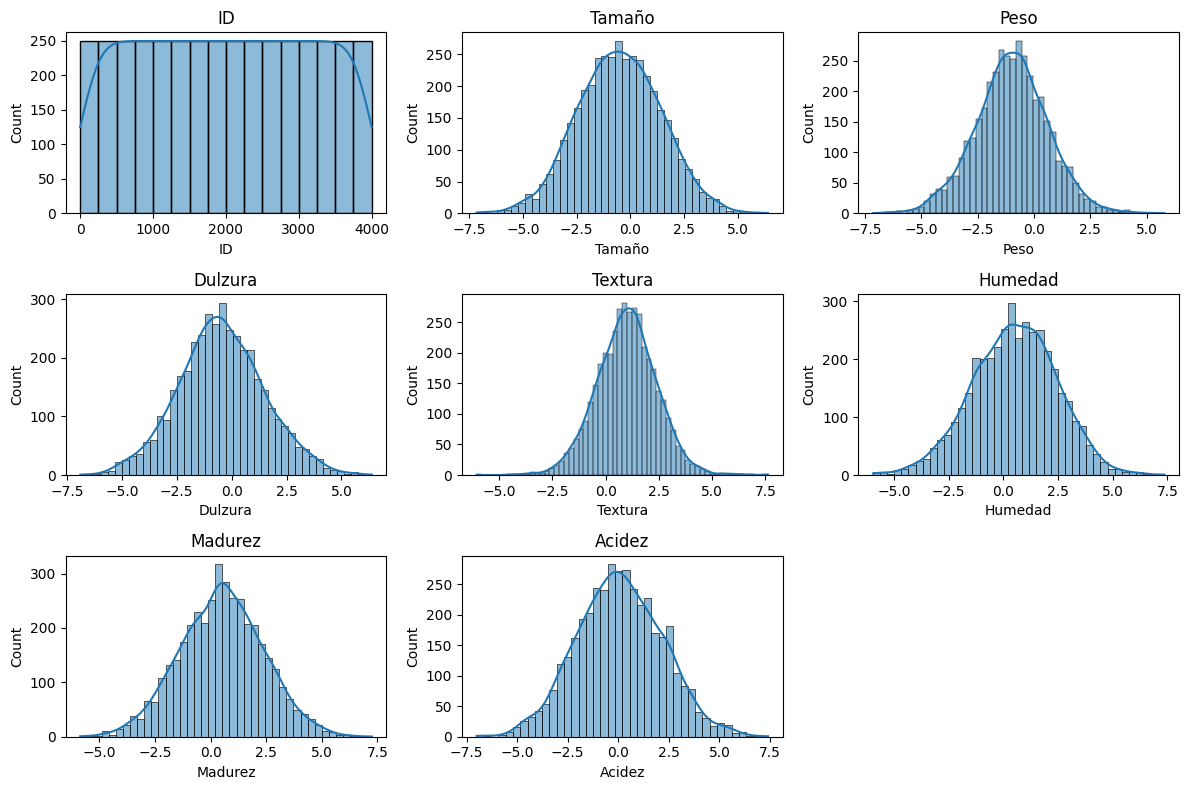

In [76]:
# Gráficos para variables numéricas
plt.figure(figsize=(12, 8))
for i, col in enumerate(datos.select_dtypes(include=['float64', 'int64']).columns, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data=datos, x=col, kde=True)
    plt.title(col)
plt.tight_layout()

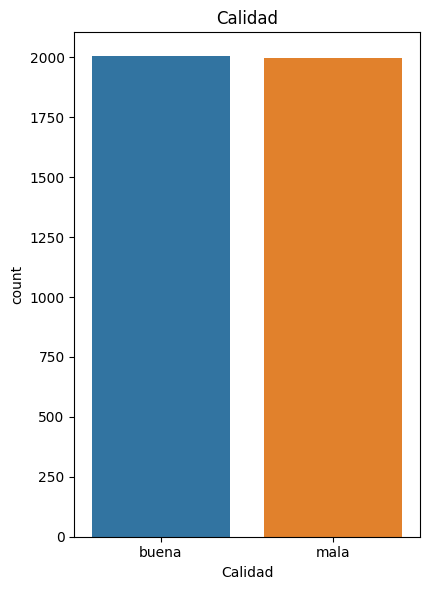

In [77]:
# Gráficos para variables categóricas
plt.figure(figsize=(8, 6))
for i, col in enumerate(datos.select_dtypes(include=['object']).columns, start=1):
    plt.subplot(1, 2, i)
    sns.countplot(data=datos, x=col)
    plt.title(col)
plt.tight_layout()

EJERCICIO 1.4

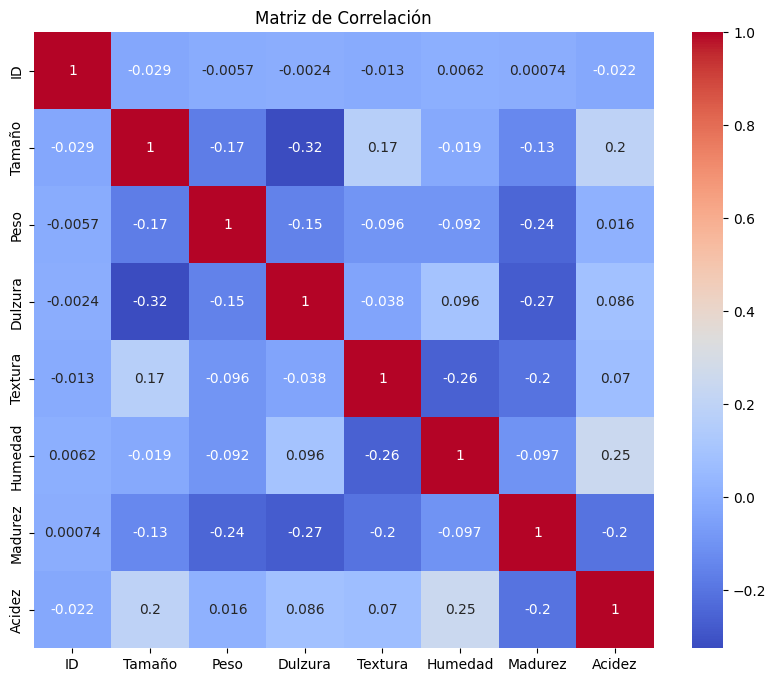

C:\Users\50242\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

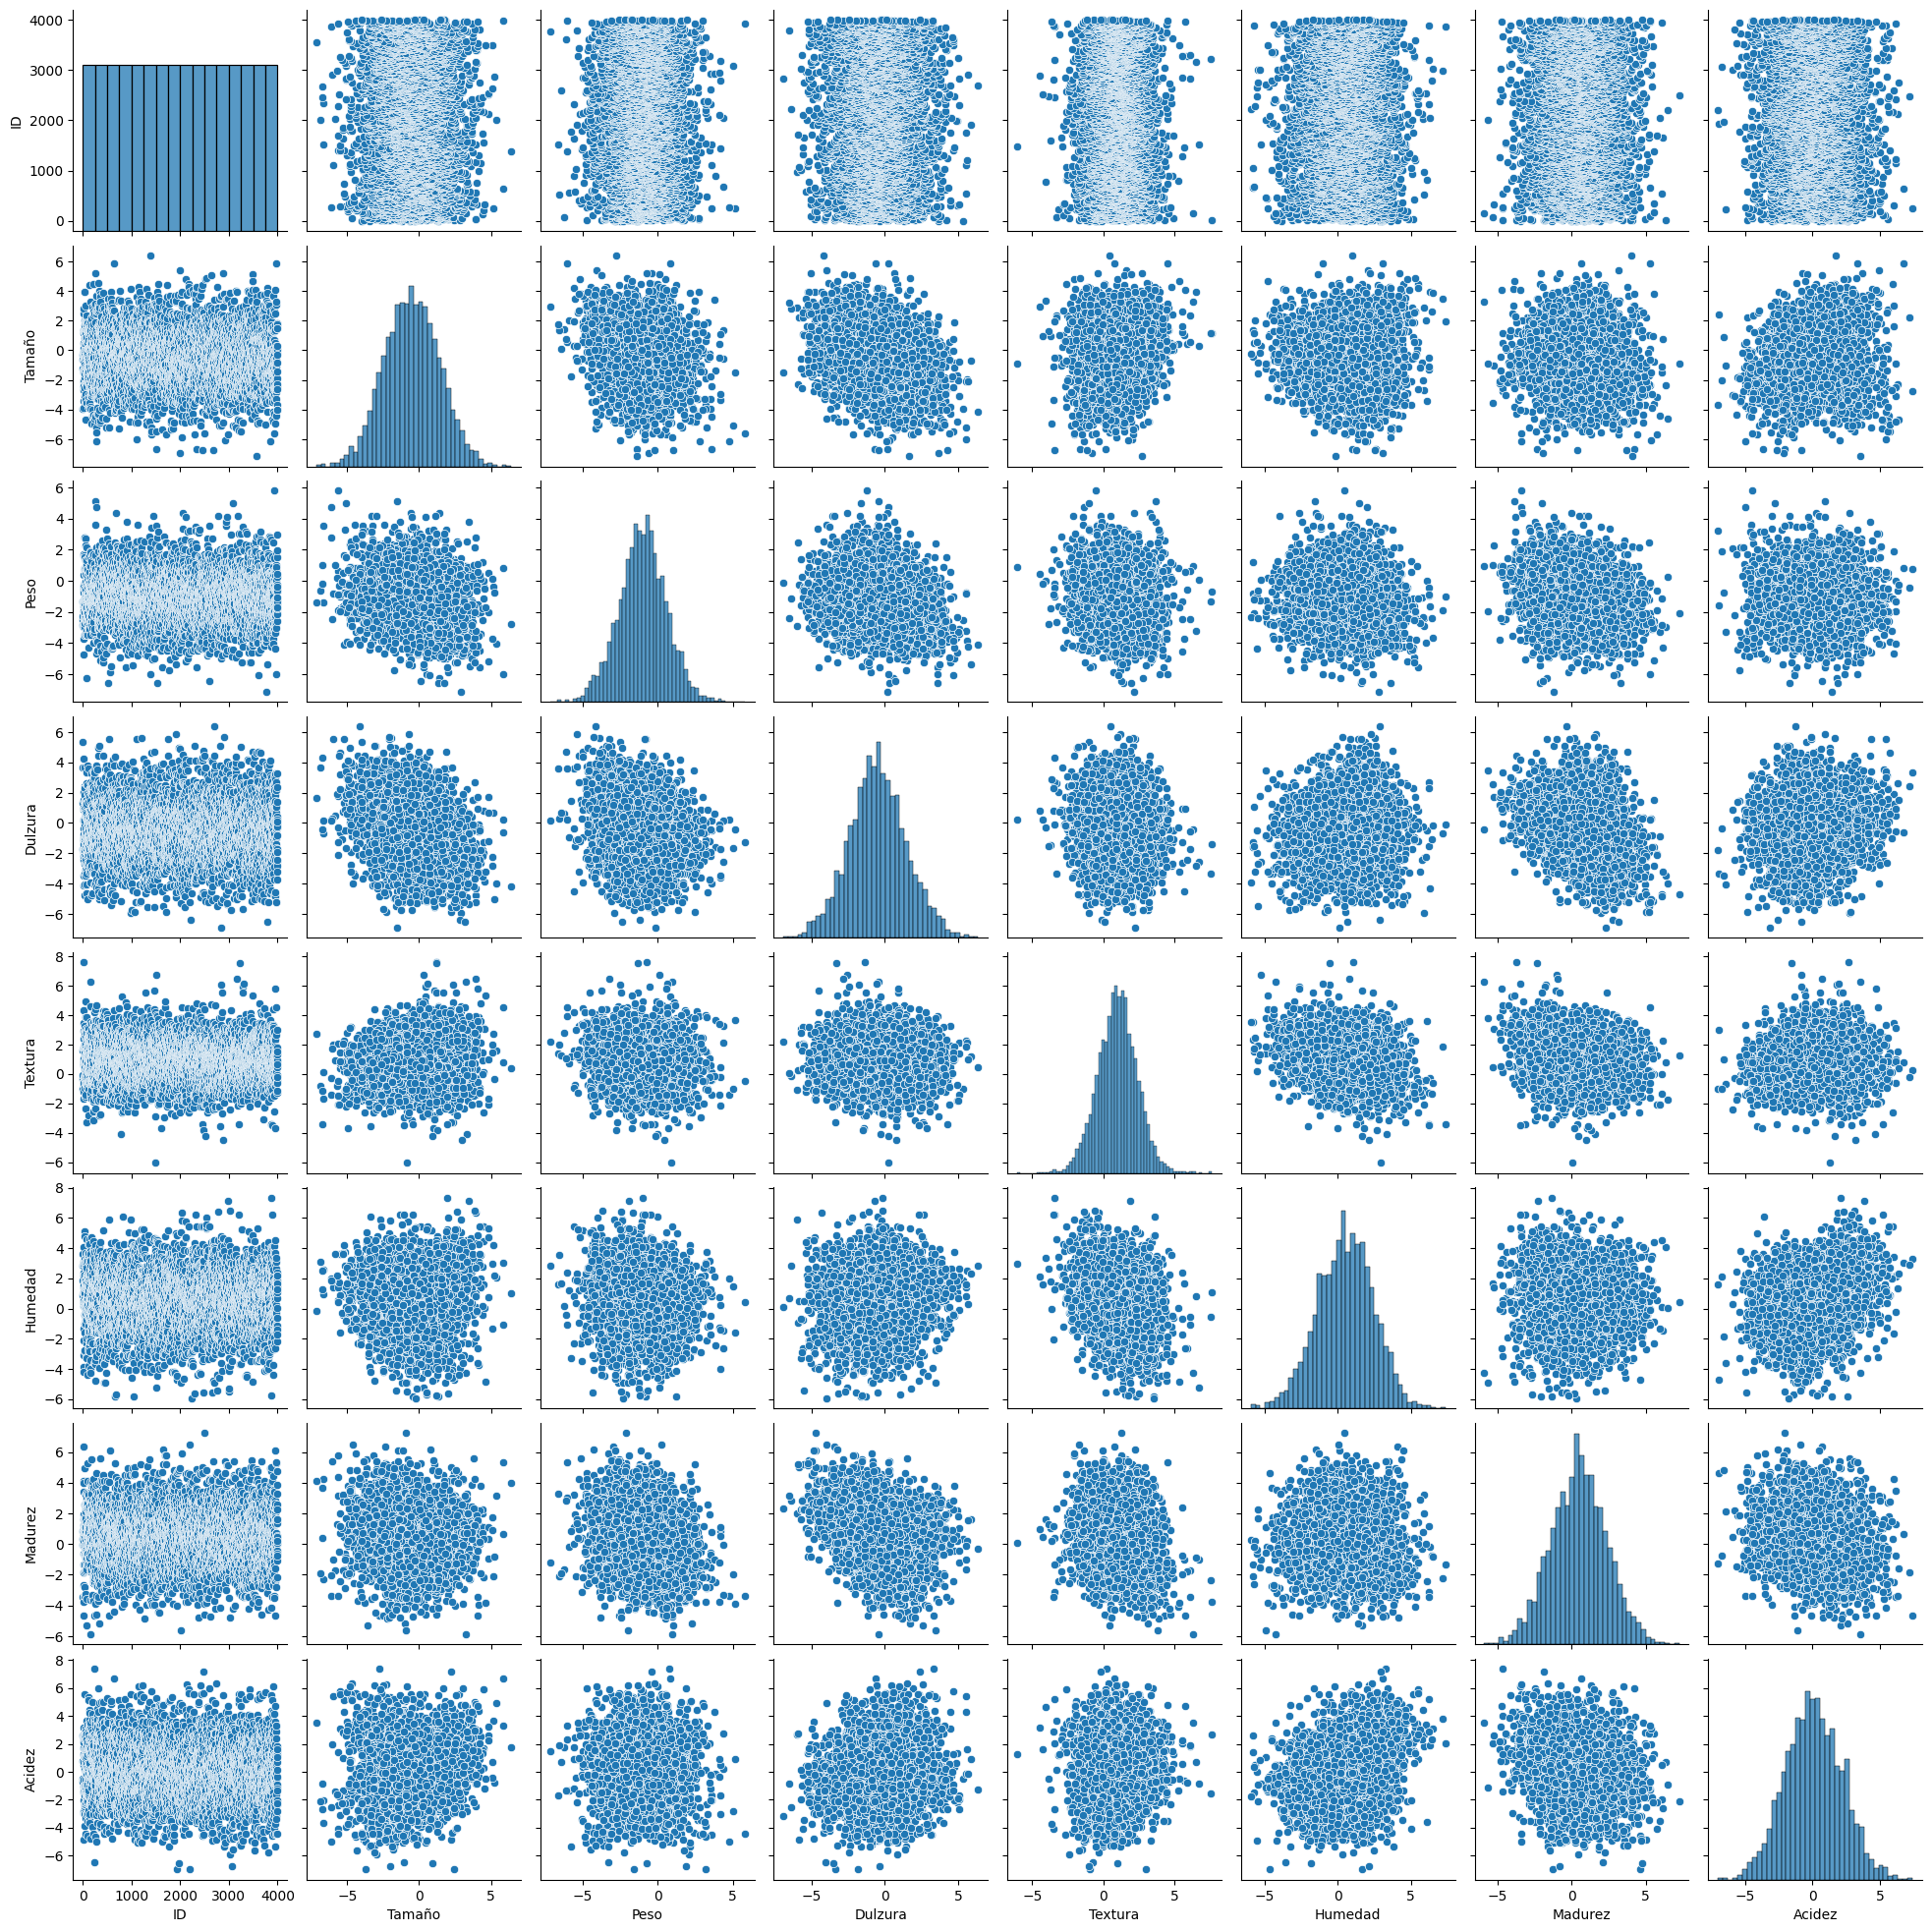

In [78]:
# Aislar variables numéricas y categóricas
variables_numericas = datos.select_dtypes(include=['float64', 'int64'])
variables_categoricas = datos.select_dtypes(include=['object'])

# Matriz de correlación
correlacion = variables_numericas.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Gráfico de dispersión
plt.figure(figsize=(10, 8))
sns.pairplot(variables_numericas)
plt.show()

EJERCICIO 1.5

Frecuencias para Calidad:
buena    2004
mala     1996
Name: Calidad, dtype: int64




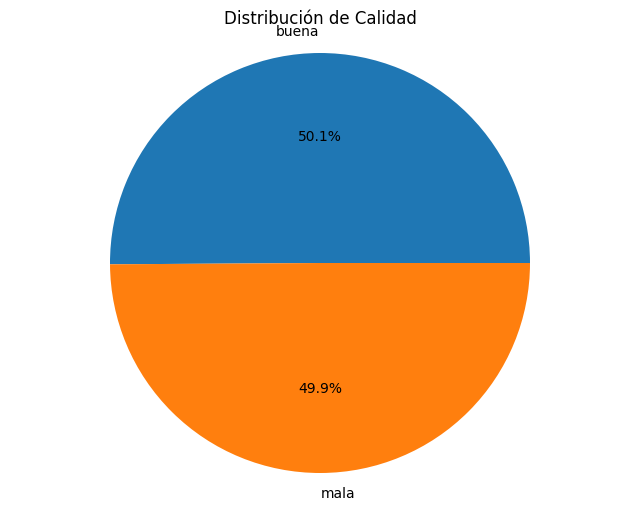

Proporciones para Calidad:
buena    0.501
mala     0.499
Name: Calidad, dtype: float64




In [79]:
print(f"Frecuencias para {'Calidad'}:")
print(datos[columna].value_counts())
print("\n")

# Gráfico de pie para variabe de calidad

plt.figure(figsize=(8, 6))
frecuencias = datos['Calidad'].value_counts()
etiquetas = frecuencias.index
valores = frecuencias.values
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.title(f'Distribución de {columna}')
plt.axis('equal')
plt.show()

# Proporciones

print(f"Proporciones para {'Calidad'}:")
proporciones = datos[columna].value_counts(normalize=True)
print(proporciones)
print("\n")

EJERCICIO 1.6

In [80]:
variables_numericas = datos.select_dtypes(include=['float64', 'int64'])

# Identificar y tratar valores atípicos (outliers)
for columna in variables_numericas.columns:
    q1 = datos[columna].quantile(0.25)
    q3 = datos[columna].quantile(0.75)
    rango_intercuartil = q3 - q1
    limite_inferior = q1 - 1.5 * rango_intercuartil
    limite_superior = q3 + 1.5 * rango_intercuartil
    datos.loc[(datos[columna] < limite_inferior) | (datos[columna] > limite_superior), columna] = np.nan

# Tratar valores faltantes en variables numéricas
for columna in variables_numericas.columns:
    datos[columna] = datos[columna].fillna(datos[columna].median())

# Limpieza de variables categóricas
variables_categoricas = datos.select_dtypes(include=['object'])

# Convertir a minúsculas
for columna in variables_categoricas.columns:
    datos[columna] = datos[columna].str.lower()

# Reemplazar valores inconsistentes
datos['Calidad'] = datos['Calidad'].replace(['buen', 'buena '], 'buena')

# Tratar valores faltantes en variables categóricas
for columna in variables_categoricas.columns:
    datos[columna] = datos[columna].fillna('sin_datos')

### EJERCICIO 2

REGRESIÓN LOGÍSTICA

Precisión en conjunto de entrenamiento: 0.7325
Precisión en conjunto de prueba: 0.7328339575530587


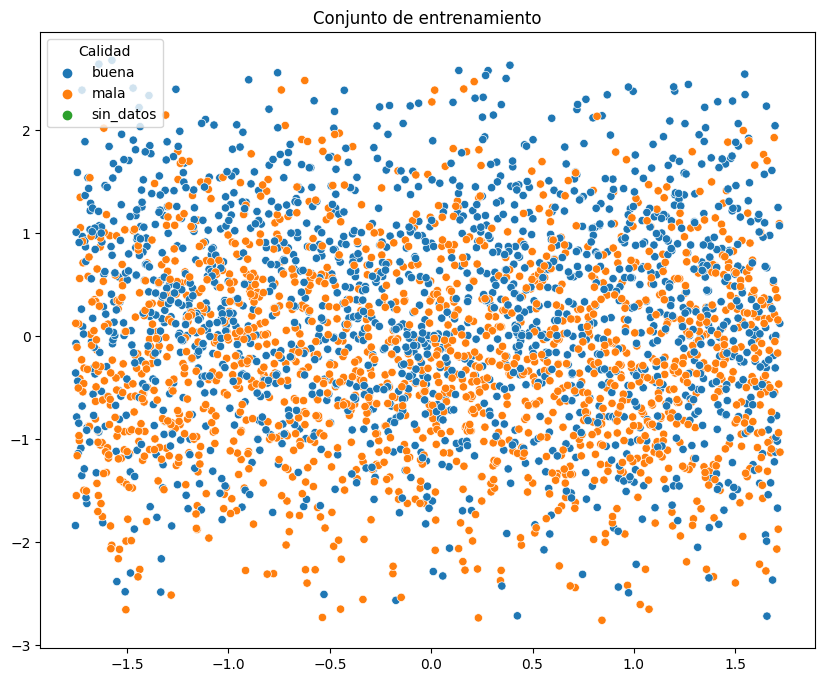

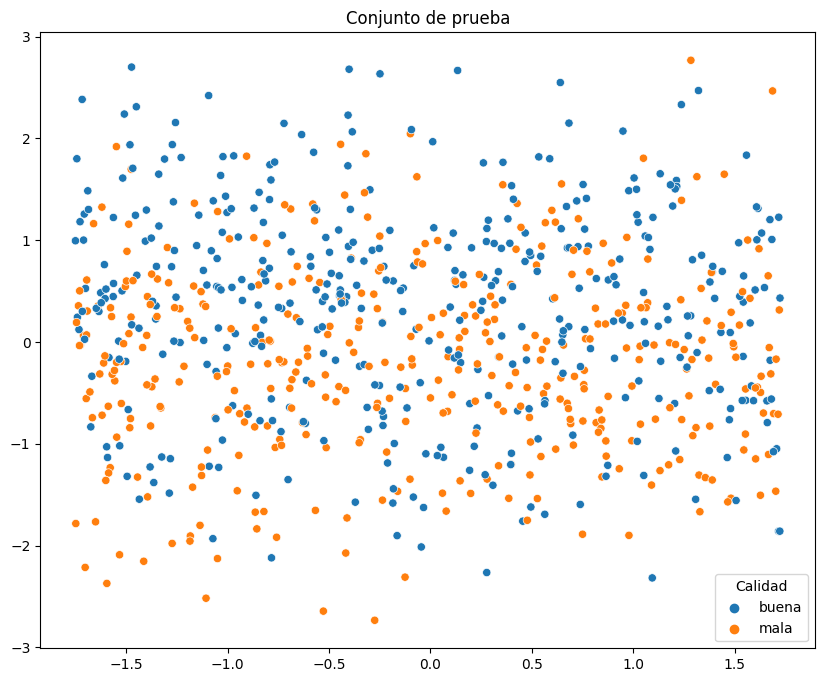

In [81]:
# Separar características (X) y la variable objetivo (y)
X = X = datos.iloc[:, :-1].values
y = datos['Calidad']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline para manejar los valores nulos y escalar características
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'), 
    StandardScaler() 
)

# Aplicar el pipeline al conjunto de entrenamiento y prueba
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_processed, y_train)

# Evaluar el modelo
train_accuracy = model.score(X_train_processed, y_train)
test_accuracy = model.score(X_test_processed, y_test)

print(f"Precisión en conjunto de entrenamiento: {train_accuracy}")
print(f"Precisión en conjunto de prueba: {test_accuracy}")

# Grafico del conjunto de entrenamiento
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_processed[:, 0], y=X_train_processed[:, 1], hue=y_train)
plt.title('Conjunto de entrenamiento')
plt.show()

# Grafico del conjunto de prueba
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_test_processed[:, 0], y=X_test_processed[:, 1], hue=y_test)
plt.title('Conjunto de prueba')
plt.show()

CLASIFICACIÓN KNN

Precisión en conjunto de entrenamiento: 0.9234375
Precisión en conjunto de prueba: 0.867665418227216


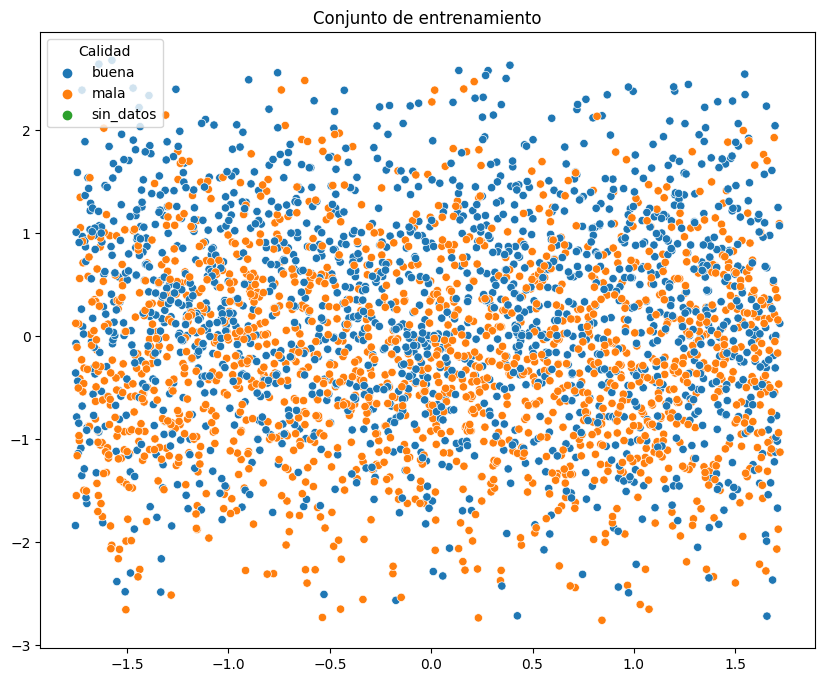

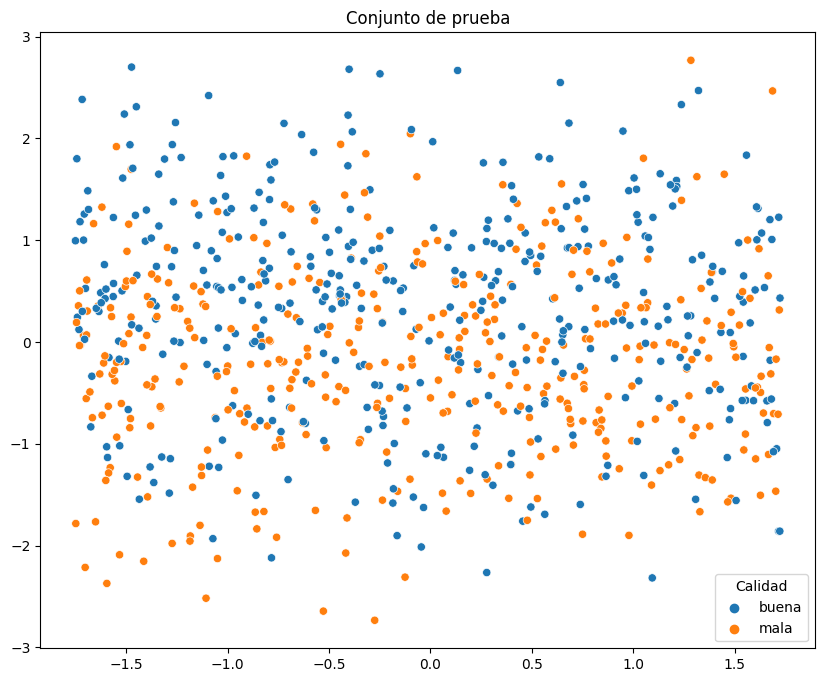

In [82]:
# Separar características (X) y la variable objetivo (y)
X = datos.iloc[:, :-1].values
y = datos['Calidad']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline para manejar los valores nulos y escalar características
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'), 
    StandardScaler() 
)

# Aplicar el pipeline al conjunto de entrenamiento y prueba
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Inicializar y entrenar el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_processed, y_train)

# Realizar predicciones
y_pred = knn_model.predict(X_test_processed)

# Evaluar el modelo
train_accuracy = knn_model.score(X_train_processed, y_train)
test_accuracy = knn_model.score(X_test_processed, y_test)

print(f"Precisión en conjunto de entrenamiento: {train_accuracy}")
print(f"Precisión en conjunto de prueba: {test_accuracy}")

# Grafico del conjunto de entrenamiento
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_processed[:, 0], y=X_train_processed[:, 1], hue=y_train)
plt.title('Conjunto de entrenamiento')
plt.show()

# Grafico del conjunto de prueba
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_test_processed[:, 0], y=X_test_processed[:, 1], hue=y_test)
plt.title('Conjunto de prueba')
plt.show()


CLASIFICACIÓN SVM

Precisión en conjunto de entrenamiento: 0.735625
Precisión en conjunto de prueba: 0.7415730337078652


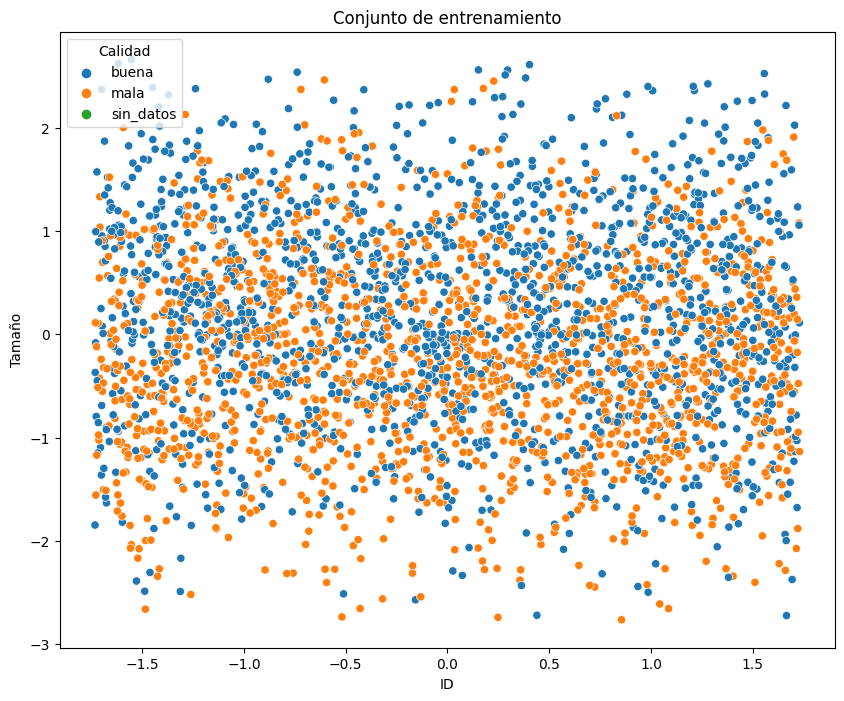

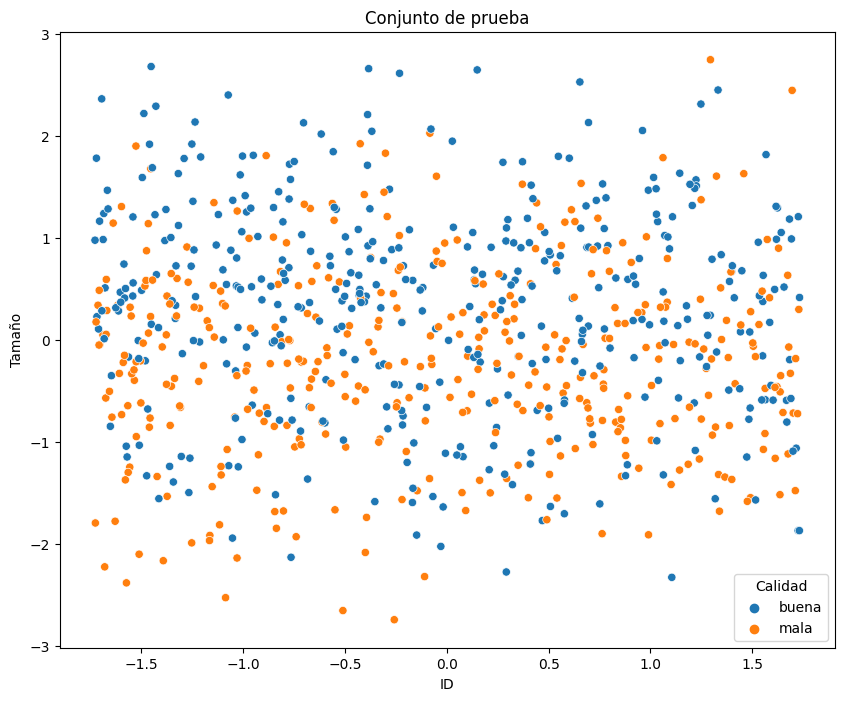

In [83]:
from sklearn.preprocessing import StandardScaler
escalador = StandardScaler()

escalador.fit(datos.drop('Calidad', axis=1))
cols_esc = escalador.transform(datos.drop('Calidad', axis=1))

df_esc = pd.DataFrame(cols_esc, columns=datos.columns[:-1])
df_esc.head()

# Dividir los datos en características y variable objetivo
X = df_esc
y = datos['Calidad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de máquina de vectores de soporte
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Evaluar el modelo
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Precisión en conjunto de entrenamiento: {train_accuracy}")
print(f"Precisión en conjunto de prueba: {test_accuracy}")

# Grafico del conjunto de entrenamiento
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], hue=y_train)
plt.title('Conjunto de entrenamiento')
plt.show()

# Grafico del conjunto de prueba
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_test)
plt.title('Conjunto de prueba')
plt.show()


CLASIFICACIÓN SVM KERNEL

Precisión en conjunto de entrenamiento: 0.881875
Precisión en conjunto de prueba: 0.8926342072409488


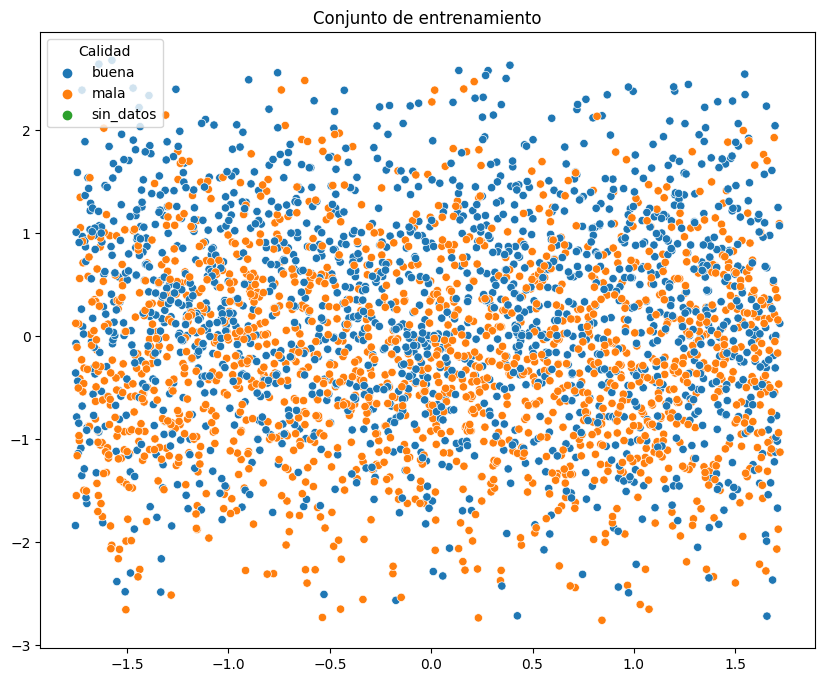

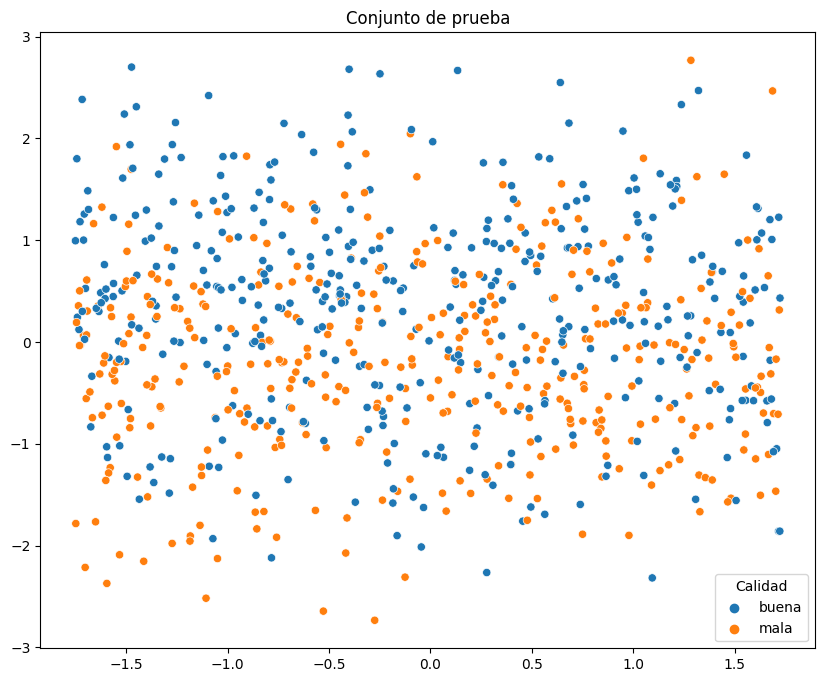

In [84]:
# Separar características (X) y la variable objetivo (y)
X = datos.iloc[:, :-1].values
y = datos['Calidad']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline para manejar los valores nulos y escalar características
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler() 
)

# Aplicar el pipeline al conjunto de entrenamiento y prueba
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Inicializar y entrenar el modelo SVM con kernel RBF
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale') 
svm_model.fit(X_train_processed, y_train)

# Realizar predicciones
y_pred = svm_model.predict(X_test_processed)

# Evaluar el modelo
train_accuracy = svm_model.score(X_train_processed, y_train)
test_accuracy = svm_model.score(X_test_processed, y_test)

print(f"Precisión en conjunto de entrenamiento: {train_accuracy}")
print(f"Precisión en conjunto de prueba: {test_accuracy}")

# Grafico del conjunto de entrenamiento
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_processed[:, 0], y=X_train_processed[:, 1], hue=y_train)
plt.title('Conjunto de entrenamiento')
plt.show()

# Grafico del conjunto de prueba
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_test_processed[:, 0], y=X_test_processed[:, 1], hue=y_test)
plt.title('Conjunto de prueba')
plt.show()

CLASIFICACIÓN NAIVE BAYES

Precisión en conjunto de entrenamiento: 0.73875
Precisión en conjunto de prueba: 0.7503121098626716


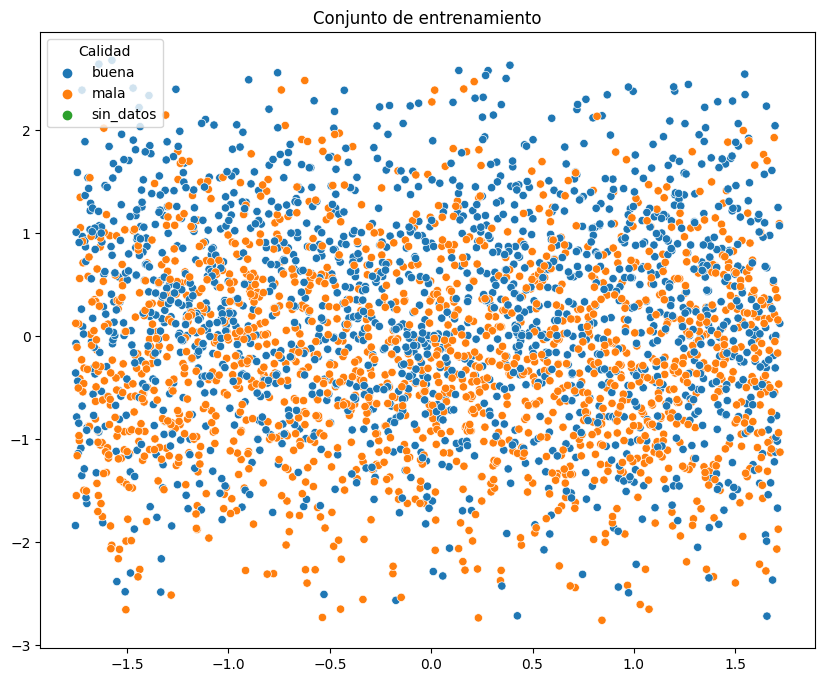

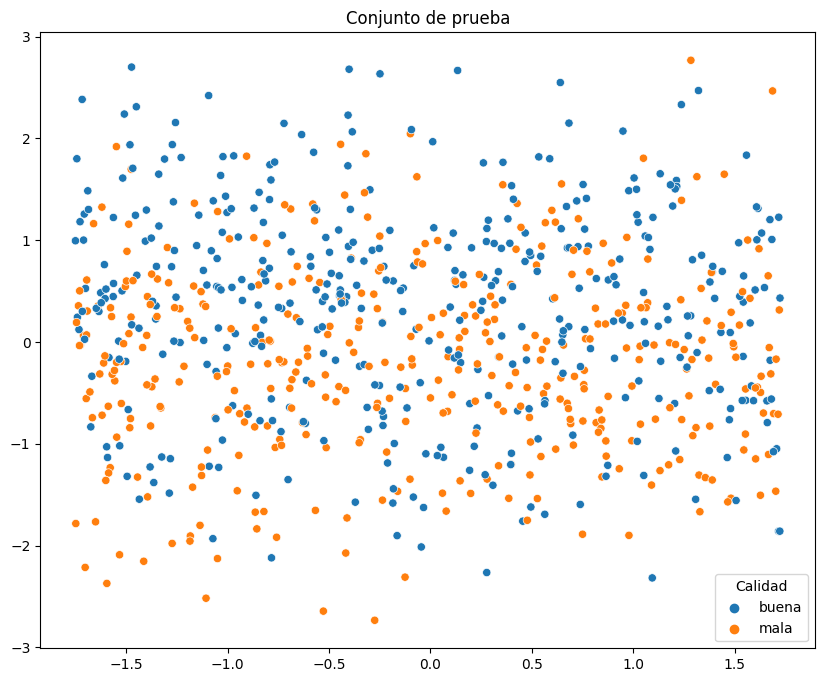

In [85]:
# Separar características (X) y la variable objetivo (y)
X = datos.iloc[:, :-1].values
y = datos['Calidad']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline para manejar los valores nulos y escalar características
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

# Aplicar el pipeline al conjunto de entrenamiento y prueba
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Inicializar y entrenar el modelo Naive Bayes (Gaussian)
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_processed, y_train)

# Realizar predicciones
y_pred = naive_bayes_model.predict(X_test_processed)

# Evaluar el modelo
train_accuracy = naive_bayes_model.score(X_train_processed, y_train)
test_accuracy = naive_bayes_model.score(X_test_processed, y_test)

print(f"Precisión en conjunto de entrenamiento: {train_accuracy}")
print(f"Precisión en conjunto de prueba: {test_accuracy}")

# Grafico del conjunto de entrenamiento
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_processed[:, 0], y=X_train_processed[:, 1], hue=y_train)
plt.title('Conjunto de entrenamiento')
plt.show()

# Grafico del conjunto de prueba
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_test_processed[:, 0], y=X_test_processed[:, 1], hue=y_test)
plt.title('Conjunto de prueba')
plt.show()

CLASIFICACIÓN ÁRBOL DE DECISIÓN

Precisión en conjunto de entrenamiento: 1.0
Precisión en conjunto de prueba: 0.7927590511860175


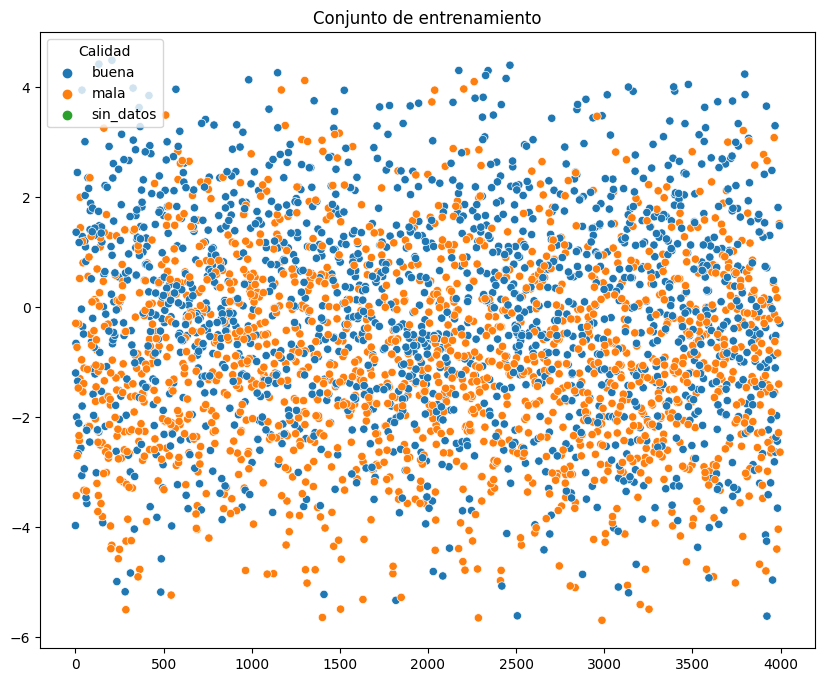

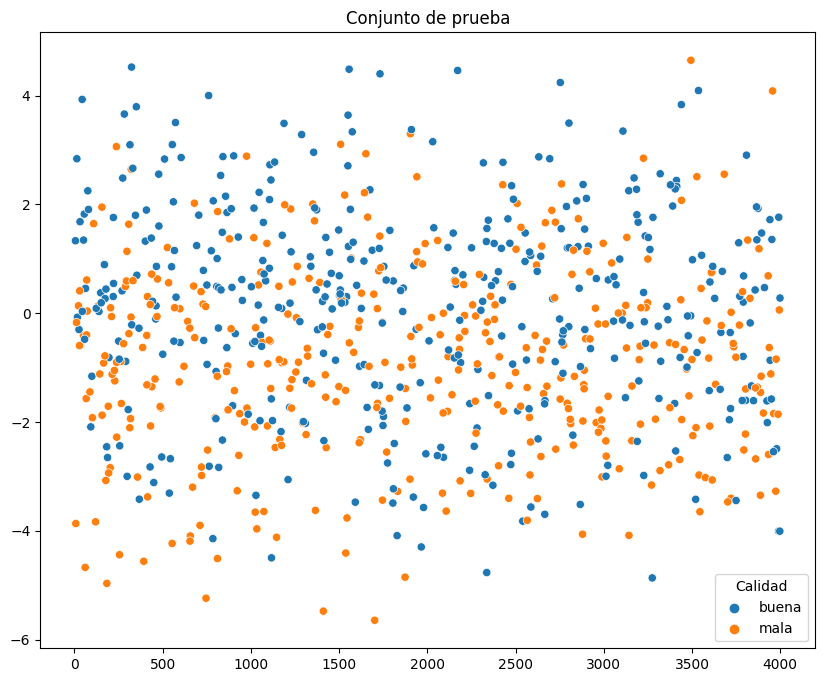

In [86]:
# Separar características (X) y la variable objetivo (y)
X = datos.iloc[:, :-1].values
y = datos['Calidad']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de árbol de decisión
decision_tree_model = DecisionTreeClassifier(random_state=42) 
decision_tree_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = decision_tree_model.predict(X_test)

# Evaluar el modelo
train_accuracy = decision_tree_model.score(X_train, y_train)
test_accuracy = decision_tree_model.score(X_test, y_test)

print(f"Precisión en conjunto de entrenamiento: {train_accuracy}")
print(f"Precisión en conjunto de prueba: {test_accuracy}")

# Grafico del conjunto de entrenamiento
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title('Conjunto de entrenamiento')
plt.show()

# Grafico del conjunto de prueba
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test)
plt.title('Conjunto de prueba')
plt.show()

CLASIFICACIÓN RANDOM FOREST

Precisión en conjunto de entrenamiento: 1.0
Precisión en conjunto de prueba: 0.8838951310861424


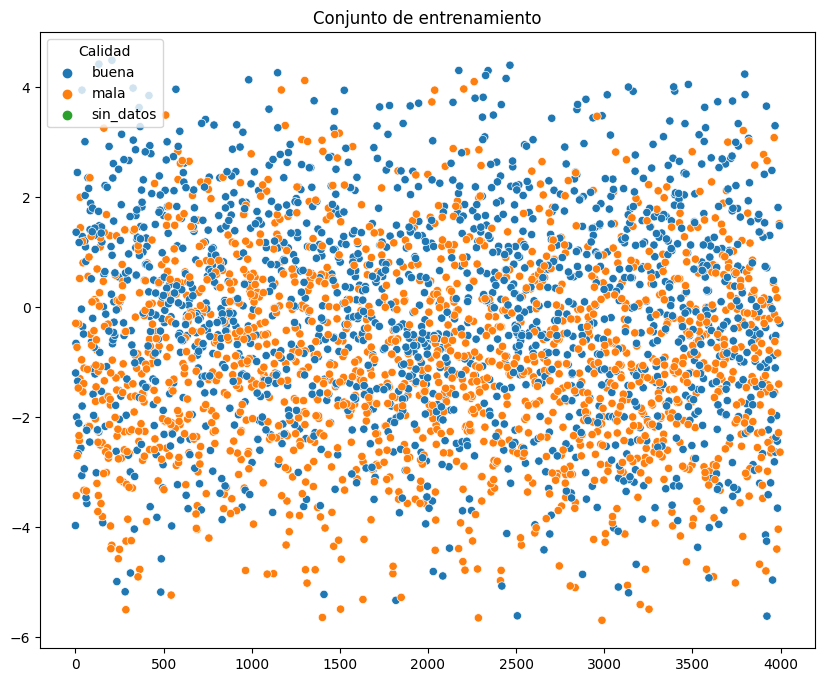

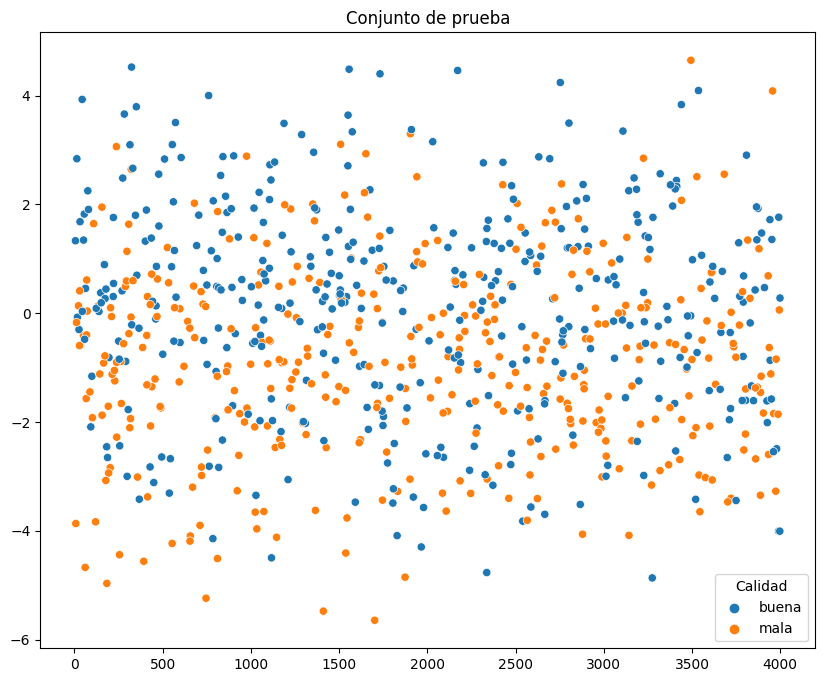

In [87]:
# Separar características (X) y la variable objetivo (y)
X = datos.iloc[:, :-1].values
y = datos['Calidad']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = random_forest_model.predict(X_test)

# Evaluar el modelo
train_accuracy = random_forest_model.score(X_train, y_train)
test_accuracy = random_forest_model.score(X_test, y_test)

print(f"Precisión en conjunto de entrenamiento: {train_accuracy}")
print(f"Precisión en conjunto de prueba: {test_accuracy}")

# Grafico del conjunto de entrenamiento
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title('Conjunto de entrenamiento')
plt.show()

# Grafico del conjunto de prueba
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test)
plt.title('Conjunto de prueba')
plt.show()